### Plotting relative AA results from THAA measurement using python for _T. weissflogii_ rot experiment

Starting with:

    Total acid hydrolyzable concentrations of the following amino acids:
    
        Histidine
        Arginine
        Serine
        Glycine
        Aspartic Acid
        Glutamic Acid
        Threonine
        Alanine
        Proline
        Lysine
        Tyrosine
        Methionine
        Valine
        Isoleucine
        Leucine
        Phenylalaine


Goal:

    Compare relative AA from this approach to peptides from peptidomics
    Make figure showing AA compositions of THAA and peptides over rot timepoints (Days 0,2,5,12)
    
Using:

    - pandas
    - matplotlib
    - numpy

In [1]:
# LIBRARIES
#import pandas library for working with tabular data
import os
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kde
#import regular expresson (regex)
import re
#check pandas version
pd.__version__

'1.0.5'

### AA compositions across sample set

In [25]:
# for each of the 4 rot timepoint samples:
# read in concentrations from individual files


T0 = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/thaa/T0-THAA-conc.csv")
T2 = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/thaa/T2-THAA-conc.csv")
T5 = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/thaa/T5-THAA-conc.csv")
T12 = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/thaa/T12-THAA-conc.csv")


frames = [T0, T2, T5, T12]
index = ['1. T0 dig.', '2. T2 dig.', '3. T5 dig.', '4. T12 dig.']

# concatenate dataframes
tot = pd.concat(frames, sort=False, ignore_index=True)

# there's a useless column in there
tot = tot.loc[:, ~tot.columns.str.contains('^Unnamed')]

# reindex with sample names
names = ['1. T0 THAA', '2. T2 THAA', '3. T5 THAA', '4. T12 THAA']
tot.insert(loc=0, column='sample', value=names)
tot.set_index('sample')

# separate out the dataframe into AAs and %PTMs, too
sum_AA = tot[['sample', 'A-conc', 'D-conc', 'E-conc', 'F-conc', 'G-conc', 'H-conc', 'I-conc', 'K-conc', \
              'L-conc', 'M-conc', 'P-conc', 'R-conc', 'S-conc', 'T-conc', 'V-conc', \
              'Y-conc']].copy()


sum_AA.head()

,sample,A-conc,D-conc,E-conc,F-conc,G-conc,H-conc,I-conc,K-conc,L-conc,M-conc,P-conc,R-conc,S-conc,T-conc,V-conc,Y-conc
0,1. T0 THAA,1.161,1.276,1.213,0.705,1.394,0.196,0.755,0.483,1.267,0.240,0.600,0.510,0.732,0.619,0.804,0.340
1,2. T2 THAA,0.982,0.964,0.961,0.601,1.143,0.154,0.654,0.461,0.976,0.064,0.472,0.386,0.574,0.482,0.642,0.247
2,3. T5 THAA,1.216,1.219,1.120,0.786,1.501,0.203,0.752,0.363,1.233,0.263,0.569,0.395,0.788,0.668,0.777,0.336
3,4. T12 THAA,1.718,1.767,1.504,0.971,1.943,0.250,0.999,0.532,1.619,0.353,0.733,0.522,0.920,0.873,1.081,0.432


In [26]:
# sum all the AAs in each dataset, making a new column

sum_AA['AA-Total-conc'] = sum_AA['A-conc'] + sum_AA['D-conc'] + sum_AA['E-conc'] \
+ sum_AA['F-conc'] + sum_AA['G-conc'] + sum_AA['H-conc'] + sum_AA['K-conc'] + sum_AA['I-conc'] + sum_AA['L-conc'] \
+ sum_AA['M-conc'] + sum_AA['P-conc'] + sum_AA['R-conc'] \
+ sum_AA['S-conc'] + sum_AA['T-conc'] + sum_AA['V-conc'] + sum_AA['Y-conc'] \

# calculate the relative (conc-normalized) AA composition (fractions of AA total for each dataset)

sum_AA['A_Relconc'] = sum_AA['A-conc']/sum_AA['AA-Total-conc']  #A
sum_AA['D_Relconc'] = sum_AA['D-conc']/sum_AA['AA-Total-conc']  #D
sum_AA['E_Relconc'] = sum_AA['E-conc']/sum_AA['AA-Total-conc']  #E
sum_AA['F_Relconc'] = sum_AA['F-conc']/sum_AA['AA-Total-conc']  #F
sum_AA['G_Relconc'] = sum_AA['G-conc']/sum_AA['AA-Total-conc']  #G
sum_AA['H_Relconc'] = sum_AA['H-conc']/sum_AA['AA-Total-conc']  #H
sum_AA['K_Relconc'] = sum_AA['K-conc']/sum_AA['AA-Total-conc']  #K
sum_AA['I/L_Relconc'] = (sum_AA['I-conc'] + sum_AA['L-conc'])/sum_AA['AA-Total-conc']  #I/L
sum_AA['M_Relconc'] = sum_AA['M-conc']/sum_AA['AA-Total-conc']  #M
sum_AA['P_Relconc'] = sum_AA['P-conc']/sum_AA['AA-Total-conc']  #P
sum_AA['R_Relconc'] = sum_AA['R-conc']/sum_AA['AA-Total-conc']  #R
sum_AA['S_Relconc'] = sum_AA['S-conc']/sum_AA['AA-Total-conc']  #S
sum_AA['T_Relconc'] = sum_AA['T-conc']/sum_AA['AA-Total-conc']  #T
sum_AA['V_Relconc'] = sum_AA['V-conc']/sum_AA['AA-Total-conc']  #V
sum_AA['Y_Relconc'] = sum_AA['Y-conc']/sum_AA['AA-Total-conc']  #Y

# make a smaller dataframe with just the relative, conc-normalized AA compositions
sum_relAA = sum_AA[['sample', 'A_Relconc', 'D_Relconc', 'E_Relconc', 'F_Relconc', 'G_Relconc', 'H_Relconc', \
                      'K_Relconc', 'I/L_Relconc', 'M_Relconc', 'P_Relconc', 'R_Relconc', \
                      'S_Relconc', 'T_Relconc', 'V_Relconc', 'Y_Relconc']].copy()

#export as a csv

sum_relAA.to_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/thaa/THAA_relAA.csv")

sum_relAA.head(6)

,sample,A_Relconc,D_Relconc,E_Relconc,F_Relconc,G_Relconc,H_Relconc,K_Relconc,I/L_Relconc,M_Relconc,P_Relconc,R_Relconc,S_Relconc,T_Relconc,V_Relconc,Y_Relconc
0,1. T0 THAA,0.094429,0.103782,0.098658,0.057340,0.113379,0.015941,0.039284,0.164457,0.019520,0.048800,0.041480,0.059536,0.050346,0.065392,0.027654
1,2. T2 THAA,0.100584,0.098740,0.098433,0.061559,0.117075,0.015774,0.047219,0.166957,0.006555,0.048346,0.039537,0.058793,0.049370,0.065758,0.025300
2,3. T5 THAA,0.099762,0.100008,0.091886,0.064484,0.123144,0.016654,0.029781,0.162852,0.021577,0.046681,0.032406,0.064648,0.054804,0.063746,0.027566
3,4. T12 THAA,0.105938,0.108960,0.092742,0.059875,0.119813,0.015416,0.032805,0.161436,0.021767,0.045199,0.032188,0.056731,0.053832,0.066658,0.026639


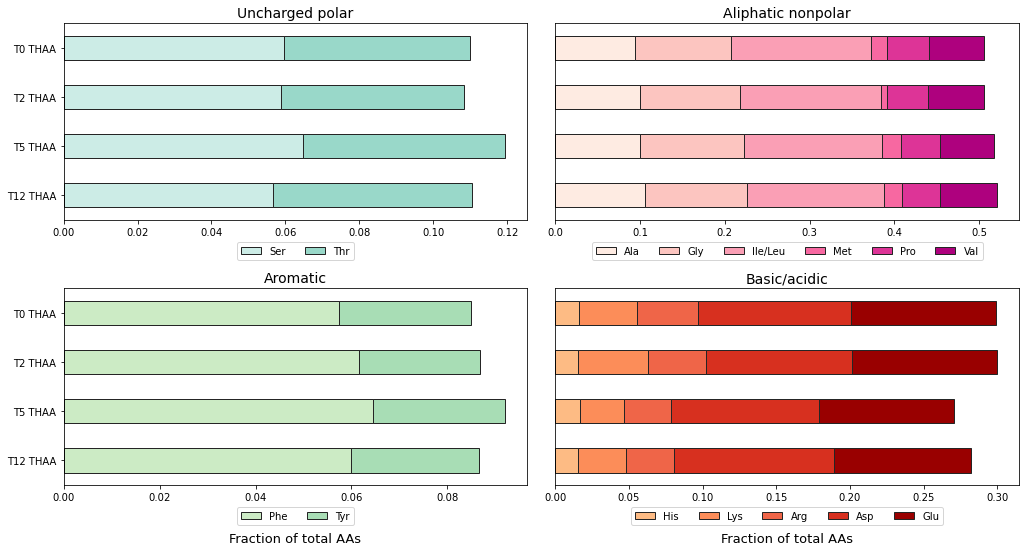

In [28]:
# plotting the AA compositions by residue type (charge, side group)
# order the horizontal bars by sample

sum_relAA_des = sum_relAA.sort_values('sample',ascending=False)

col_up = '#ccece6', '#99d8c9', '#66c2a4', '#2ca25f', '#006d2c'
col_na = '#feebe2', '#fcc5c0', '#fa9fb5', '#f768a1', '#dd3497', '#ae017e'
col_ar = '#ccebc5', '#a8ddb5', '#7bccc4', '#4eb3d3', '#2b8cbe', '#08589e'
col_ba = '#fdbb84', '#fc8d59', '#ef6548', '#d7301f', '#990000'

# divide up the dataframe into 4 smaller dataframes based on AA class

# uncharged polar: serine, threonine
up = sum_relAA_des[['sample', 'S_Relconc', 'T_Relconc']].copy()
up_names = ['sample', 'Ser', 'Thr']
up.columns = up_names

# nonpolar, aliphatic R-group: alanine, glycine, methionine, proline, valine
na = sum_relAA_des[['sample', 'A_Relconc', 'G_Relconc','I/L_Relconc', 'M_Relconc',\
                    'P_Relconc', 'V_Relconc']].copy()
na_names = ['sample', 'Ala', 'Gly', 'Ile/Leu', 'Met', 'Pro', 'Val']
na.columns = na_names

# aromatic R-group: phenylalanine, tyrosine
ar = sum_relAA_des[['sample', 'F_Relconc', 'Y_Relconc']].copy() 
ar_names = ['sample', 'Phe', 'Tyr']
ar.columns = ar_names

# basic and acidic R-group: hisdiine, lysine, arginine, aspartic acid, glutamic acid
ba = sum_relAA_des[['sample', 'H_Relconc', 'K_Relconc', 'R_Relconc', 'D_Relconc', 'E_Relconc']].copy()
ba_names = ['sample', 'His', 'Lys', 'Arg', 'Asp', 'Glu']
ba.columns = ba_names

# plot AA comps

fig, axes = plt.subplots(figsize=(14, 7),nrows=2, ncols=2)
plt.tight_layout()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace= 0.06, hspace= 0.35)

up.plot(ax=axes[0,0], x='sample', kind='barh', stacked=True, color = col_up, edgecolor = '#252525')
na.plot(ax=axes[0,1], x='sample', kind='barh', stacked=True, color = col_na, edgecolor = '#252525')
ar.plot(ax=axes[1,0], x='sample', kind='barh', stacked=True, color = col_ar, edgecolor = '#252525')
ba.plot(ax=axes[1,1], x='sample', kind='barh', stacked=True, color = col_ba, edgecolor = '#252525')

axes[0,0].set_title('Uncharged polar', fontsize = 14)
axes[0,0].set_ylabel("")
axes[0,0].legend(bbox_to_anchor=(0.5, -0.09), loc='upper center', ncol=5)
axes[0,0].set_yticklabels( ('T12 THAA', 'T5 THAA', 'T2 THAA', 'T0 THAA') )

axes[0,1].set_title('Aliphatic nonpolar', fontsize = 14)
axes[0,1].yaxis.set_ticks([])
axes[0,1].set_ylabel("")
axes[0,1].legend(bbox_to_anchor=(0.5, -0.09), loc='upper center', ncol=6)

axes[1,0].set_title('Aromatic', fontsize = 14)
axes[1,0].set_xlabel('Fraction of total AAs', labelpad = 30, fontsize = 13)
axes[1,0].set_ylabel("")
axes[1,0].legend(bbox_to_anchor=(0.5, -0.09), loc='upper center', ncol=3)
axes[1,0].set_yticklabels( ('T12 THAA', 'T5 THAA', 'T2 THAA', 'T0 THAA') )

axes[1,1].set_title('Basic/acidic', fontsize = 14)
axes[1,1].yaxis.set_ticks([])
axes[1,1].set_xlabel('Fraction of total AAs', labelpad = 30, fontsize = 13)
axes[1,1].set_ylabel("")
axes[1,1].legend(bbox_to_anchor=(0.5, -0.09), loc='upper center', ncol=5)


# save figure in ptm-analyses dir
plt.savefig("/home/millieginty/Documents/git-repos/rot-mayer/analyses/thaa/THAA-AAs.png", dpi = 300, bbox_inches='tight', transparent=True)

# also save in manuscript latex dir high res
#plt.savefig("/home/millieginty/Documents/git-repos/denovo-etnp/ETNP-AAs.png", dpi = 300, bbox_inches='tight')

## Comparison to peptide AA composition

### Reading in the csv of peptide relative AAs as a dataframe, then compare to THAA relative AAs

In [29]:
# Read in the peptide NAAF-corrected relative AAs

digRelNAAF_all = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/AA-composition/digested-RelNAAF-AAs.csv")

# Get rid of residues that weren't measured in THAA analyses: C, N, Q, W

digRelNAAF = digRelNAAF_all[['sample', 'A_RelNAAF', 'D_RelNAAF', 'E_RelNAAF', 'F_RelNAAF', \
                             'G_RelNAAF', 'H_RelNAAF', \
                             'K_RelNAAF', 'I/L_RelNAAF', 'M_RelNAAF', \
                             'P_RelNAAF', 'R_RelNAAF', \
                             'S_RelNAAF', 'T_RelNAAF', 'V_RelNAAF', 'Y_RelNAAF']].copy()

# Rename the columns without NAAF so we can compare to the THAA

digRelNAAF.columns = ['sample', 'A_Rel', 'D_Rel', 'E_Rel', 'F_Rel', \
                             'G_Rel', 'H_Rel', \
                             'K_Rel', 'I/L_Rel', 'M_Rel', \
                             'P_Rel', 'R_Rel', \
                             'S_Rel', 'T_Rel', 'V_Rel', 'Y_Rel']

digRelNAAF.head()

,sample,A_Rel,D_Rel,E_Rel,F_Rel,G_Rel,H_Rel,K_Rel,I/L_Rel,M_Rel,P_Rel,R_Rel,S_Rel,T_Rel,V_Rel,Y_Rel
0,1. T0 dig.,0.074637,0.034549,0.054970,0.024430,0.059999,0.008150,0.046365,0.156437,0.020873,0.083231,0.082458,0.089631,0.068294,0.083289,0.015894
1,2. T2 dig.,0.062620,0.041208,0.086226,0.020772,0.052646,0.008396,0.072064,0.123702,0.015683,0.088380,0.069714,0.063111,0.072036,0.115246,0.016103
2,3. T5 dig.,0.068839,0.046597,0.076223,0.040505,0.082462,0.007395,0.059480,0.147570,0.026592,0.077353,0.078098,0.030136,0.055354,0.055963,0.031434
3,4. T12 dig.,0.068094,0.060974,0.071442,0.044921,0.074191,0.005010,0.060276,0.136536,0.032412,0.063857,0.088069,0.034431,0.065547,0.074645,0.016873


In [32]:
# Rename the THAA dataframe columns 

sum_relAA.columns = ['sample', 'A_Rel', 'D_Rel', 'E_Rel', 'F_Rel', \
                             'G_Rel', 'H_Rel', \
                             'K_Rel', 'I/L_Rel', 'M_Rel', \
                             'P_Rel', 'R_Rel', \
                             'S_Rel', 'T_Rel', 'V_Rel', 'Y_Rel']

sum_relAA.head()

,sample,A_Rel,D_Rel,E_Rel,F_Rel,G_Rel,H_Rel,K_Rel,I/L_Rel,M_Rel,P_Rel,R_Rel,S_Rel,T_Rel,V_Rel,Y_Rel
0,1. T0 THAA,0.094429,0.103782,0.098658,0.057340,0.113379,0.015941,0.039284,0.164457,0.019520,0.048800,0.041480,0.059536,0.050346,0.065392,0.027654
1,2. T2 THAA,0.100584,0.098740,0.098433,0.061559,0.117075,0.015774,0.047219,0.166957,0.006555,0.048346,0.039537,0.058793,0.049370,0.065758,0.025300
2,3. T5 THAA,0.099762,0.100008,0.091886,0.064484,0.123144,0.016654,0.029781,0.162852,0.021577,0.046681,0.032406,0.064648,0.054804,0.063746,0.027566
3,4. T12 THAA,0.105938,0.108960,0.092742,0.059875,0.119813,0.015416,0.032805,0.161436,0.021767,0.045199,0.032188,0.056731,0.053832,0.066658,0.026639


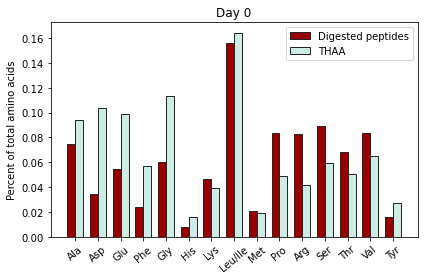

In [57]:
# Plot THAA peptides vs digested peptide AA compositions

labels = ['Ala', 'Asp', 'Glu', 'Phe', 'Gly', 'His', 'Lys', 'Leu/Ile', 'Met', 'Pro', \
         'Arg', 'Ser', 'Thr', 'Val', 'Tyr']

T0_digested_peptide = digRelNAAF.iloc[0, 1:]
T0_THAA = sum_relAA.iloc[0, 1:]

T2_digested_peptide = digRelNAAF.iloc[1, 1:]
T2_THAA = sum_relAA.iloc[1, 1:]

T5_digested_peptide = digRelNAAF.iloc[2, 1:]
T5_THAA = sum_relAA.iloc[2, 1:]

T12_digested_peptide = digRelNAAF.iloc[3, 1:]
T12_THAA = sum_relAA.iloc[3, 1:]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, T0_digested_peptide, width, label='Digested peptides', color = '#990000', edgecolor = '#252525')
rects2 = ax.bar(x + width/2, T0_THAA, width, label='THAA', color = '#ccece6', edgecolor = '#252525')

# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_ylabel('Percent of total amino acids')
ax.set_title('Day 0')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = 40)
ax.legend()

fig.tight_layout()

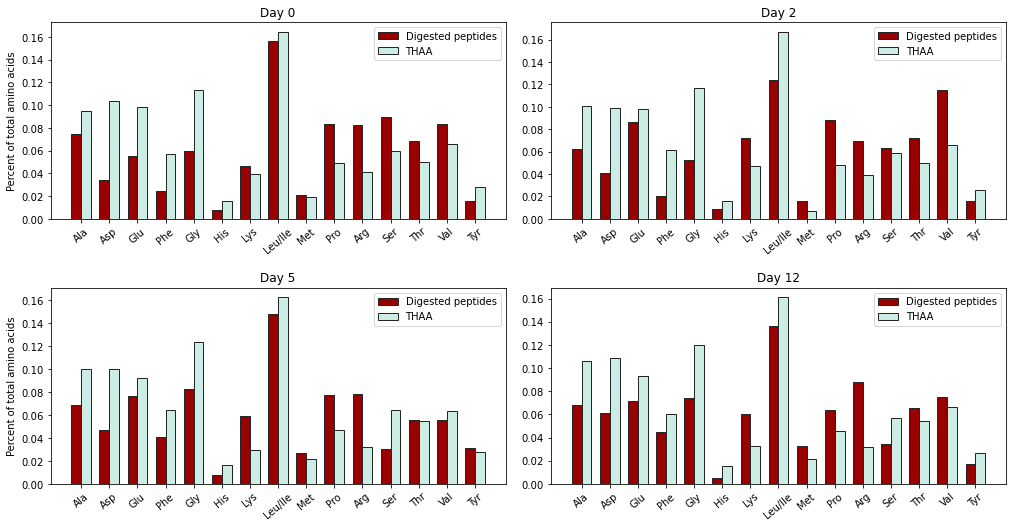

In [77]:
# Plot THAA peptides vs digested peptide AA compositions

labels = ['Ala', 'Asp', 'Glu', 'Phe', 'Gly', 'His', 'Lys', 'Leu/Ile', 'Met', 'Pro', \
         'Arg', 'Ser', 'Thr', 'Val', 'Tyr']

T0_digested_peptide = digRelNAAF.iloc[0, 1:]
T0_THAA = sum_relAA.iloc[0, 1:]

T2_digested_peptide = digRelNAAF.iloc[1, 1:]
T2_THAA = sum_relAA.iloc[1, 1:]

T5_digested_peptide = digRelNAAF.iloc[2, 1:]
T5_THAA = sum_relAA.iloc[2, 1:]

T12_digested_peptide = digRelNAAF.iloc[3, 1:]
T12_THAA = sum_relAA.iloc[3, 1:]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, axes = plt.subplots(figsize=(14, 7),nrows=2, ncols=2)
plt.tight_layout()

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace= 0.10, hspace= 0.35)

# PLOT T0

axes[0,0].bar(x - width/2, T0_digested_peptide, width, label='Digested peptides', color = '#990000', edgecolor = '#252525')
axes[0,0].bar(x + width/2, T0_THAA, width, label='THAA', color = '#ccece6', edgecolor = '#252525')

# Add some text for labels, title and custom x-axis tick labels, etc.

axes[0,0].set_ylabel('Percent of total amino acids')
axes[0,0].set_title('Day 0')
axes[0,0].set_xticks(x)
axes[0,0].set_xticklabels(labels, rotation = 40)
axes[0,0].legend()

# PLOT T2

axes[0,1].bar(x - width/2, T2_digested_peptide, width, label='Digested peptides', color = '#990000', edgecolor = '#252525')
axes[0,1].bar(x + width/2, T2_THAA, width, label='THAA', color = '#ccece6', edgecolor = '#252525')

# Add some text for labels, title and custom x-axis tick labels, etc.

#axes[0,1].set_ylabel('Percent of total amino acids')
axes[0,1].set_title('Day 2')
axes[0,1].set_xticks(x)
axes[0,1].set_xticklabels(labels, rotation = 40)
axes[0,1].legend()

# PLOT T5

axes[1,0].bar(x - width/2, T5_digested_peptide, width, label='Digested peptides', color = '#990000', edgecolor = '#252525')
axes[1,0].bar(x + width/2, T5_THAA, width, label='THAA', color = '#ccece6', edgecolor = '#252525')

# Add some text for labels, title and custom x-axis tick labels, etc.

axes[1,0].set_ylabel('Percent of total amino acids')
axes[1,0].set_title('Day 5')
axes[1,0].set_xticks(x)
axes[1,0].set_xticklabels(labels, rotation = 40)
axes[1,0].legend()

# PLOT T12

axes[1,1].bar(x - width/2, T12_digested_peptide, width, label='Digested peptides', color = '#990000', edgecolor = '#252525')
axes[1,1].bar(x + width/2, T12_THAA, width, label='THAA', color = '#ccece6', edgecolor = '#252525')

# Add some text for labels, title and custom x-axis tick labels, etc.

#axes[0,1].set_ylabel('Percent of total amino acids')
axes[1,1].set_title('Day 12')
axes[1,1].set_xticks(x)
axes[1,1].set_xticklabels(labels, rotation = 40)
axes[1,1].legend()